# Severity Classifier Evaluation

This notebook evaluates the accuracy of the severity classification model and provides examples of model explanations.

In [1]:
import sys
import os

os.chdir("..")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from core.classifier import classify_severity


In [3]:
df = pd.read_csv("data/inputs/exemplos_rotulados.csv")  # must contain 'texto' and 'gravidade_esperada'
X_train, X_test, y_train, y_test = train_test_split(df['texto'], df['gravidade_esperada'], test_size=0.2, random_state=42)


In [4]:
y_pred = [classify_severity(text)[0] for text in X_test]  # assume classify_severity returns (label, explanation)


In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

       grave       1.00      1.00      1.00         4
        leve       0.92      1.00      0.96        11
    moderada       1.00      0.80      0.89         5

    accuracy                           0.95        20
   macro avg       0.97      0.93      0.95        20
weighted avg       0.95      0.95      0.95        20



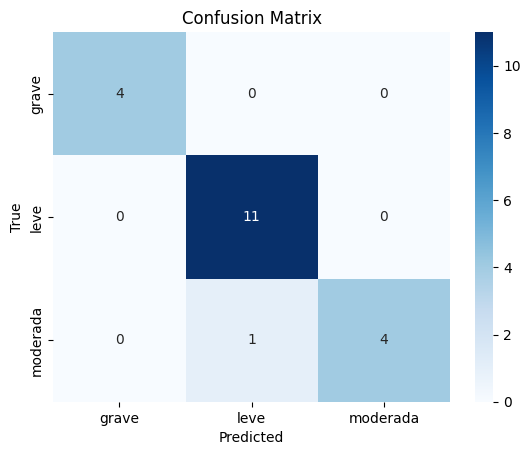

In [6]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['gravidade_esperada'].unique())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Analysis of Confusion Matrix Results

The confusion matrix shows how well the classifier predicted the severity classes: 'grave', 'leve', and 'moderada'.

Interpretation:
- 'grave': All 4 instances were correctly classified. ✅
- 'leve': Out of 11 instances, 11 were correctly predicted as 'leve'. ✅
- 'moderada': Out of 5 instances, 4 were correctly predicted, and 1 was misclassified as 'leve'. 🔄

Summary:
- The classifier performs very well overall, with only 1 misclassification out of 20 samples.
- The only confusion happened between 'moderada' and 'leve', suggesting slight ambiguity between those classes.
- No errors involving the 'grave' class, which is important for identifying critical cases.

Next Steps:
- Review the misclassified sample to assess if the text was ambiguous.
- Consider fine-tuning the model further or enriching training examples for 'moderada' to reduce overlap.

In [1]:
for i in range(5):  # Show 5 examples
    text = X_test.iloc[i]
    pred, explanation = classify_severity(text)
    print(f"Text: {text}")
    print(f"Predicted Severity: {pred}")
    print(f"Explanation: {explanation}")
    print("-" * 80)


NameError: name 'X_test' is not defined